### 1. 문제정의 단계
    - 손글씨(0~9)를 분류하는 모델을 만들어 보자.
    - 이미지 데이터의 형태를 이해해보자

### 2. 데이터 수집


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv('./data/digit_train.csv')

In [46]:
# 데이터 크기확인
data.shape

(42000, 785)

In [47]:
data.head()
# label : 정답
# pixel 0 ~ pixel 783 : 28*28 이미지 표현

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# 데이터 시각화
# 이미지 데이터로 첫번째 행의 label을 제외한 모든 컬럼 가져오기
img0 = data.iloc[0,1:]
img0.shape

(784,)

In [49]:
img0.values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [50]:
# 리스트 자료형을 28*28 2차원으로 변환
img0_reshape = img0.values.reshape(28,28)
img0_reshape

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

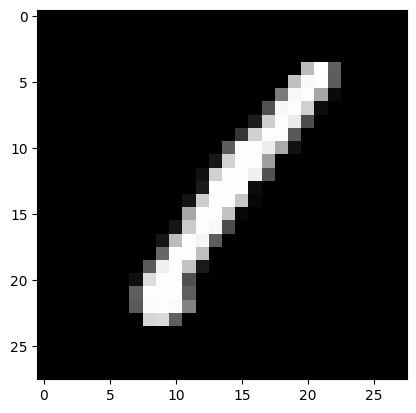

In [51]:
# 이미지 그려보기
# 컬럼값을 확인 후 gray
plt.imshow(img0_reshape,cmap="gray")
plt.show()

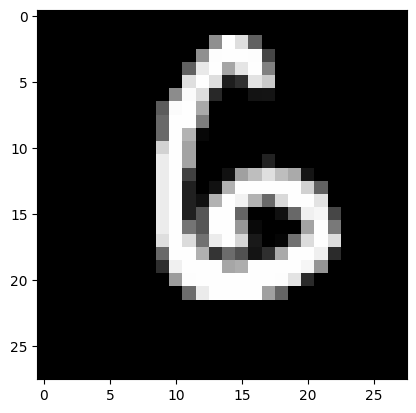

In [52]:
#13720번 행의 데이터 가져와서 이미지 출력

img12= data.iloc[13720,1:]
img12_reshape = img12.values.reshape(28,28)
plt.imshow(img12_reshape,cmap="gray")
plt.show()

### 3. 학습을 위한 데이터 분리
    - 학습(7) : 테스트(3)
    - random_state : 5

In [53]:
# 문제와 정답 구분
X = data.iloc[:,1:] 
y = data.iloc[:,0]


# 2. 문제와 정답을 7:3비율로 나눠주기
from sklearn.model_selection import train_test_split # train, test 분리도구
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=5)

#3. 크기 확인
print("문제데이터", X_train.shape, y_train.shape)
print("답 데이터", X_test.shape,y_test.shape)


문제데이터 (29400, 784) (29400,)
답 데이터 (12600, 784) (12600,)


### 4. 모델 선택
    - KNN
    - Logistic Regrssion
    - SVM

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# 모델 생성
knn_model = KNeighborsClassifier()
logi_model = LogisticRegression()
svm_model = LinearSVC()

### 5. 학습 및 평가

In [55]:
knn_model.fit(X_train,y_train)
logi_model.fit(X_train,y_train)
svm_model.fit(X_train,y_train)

c:\Users\smhrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\smhrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\smhrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warn

LinearSVC()

In [56]:
print("knn : ",knn_model.score(X_train,y_train))
print("logi : ",logi_model.score(X_train,y_train))
print('svm: ',svm_model.score(X_train,y_train))

knn :  0.9767006802721089
logi :  0.9420748299319728
svm:  0.8781632653061224


In [57]:
print("knn : ",knn_model.score(X_test,y_test))
print("logi : ",logi_model.score(X_test,y_test))
print('svm: ',svm_model.score(X_test,y_test))

knn :  0.9650793650793651
logi :  0.9147619047619048
svm:  0.8523015873015873


### 6. 데이터 스케일링
    - 이미지 픽셀정보 : 0~255 ==> 최소/최대가 고정되어 있음
    - MinMaxScaler를 사용하여 0~1 사이의 값으로 모든 픽셀을 조정
    - 스케일링 적용후 효과 확인하기
        - 학습(연산) 속도가 개선? 20초 정도 개선됨
        - 거리기반으로 예측하는 KNN 모델이 변화(값)가 있는지? 변화가 없었음
    - KNN : 데이터가 많을수록 속도가 느려짐 --> 모든데이터에 대한 거리를 계산하기 때문에

In [58]:
from   sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #값의 범위를 0~1 사이로 변환

In [59]:
# 학습
scaler.fit(X_train)

MinMaxScaler()

In [60]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
28223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# 문제데이터에 스케일링 적용 
X_train_scale= scaler.transform(X_train)
X_test_scale= scaler.transform(X_test)


In [62]:
# 스케일링 적용데이터로 다시 학습
knn_model.fit(X_train_scale,y_train)
logi_model.fit(X_train_scale,y_train)
svm_model.fit(X_train_scale,y_train)

c:\Users\smhrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\smhrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\smhrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warn

LinearSVC()

In [63]:
# 스케일링 적용 데이터의 변화값 확인 

# knn :  0.9767006802721089
# logi :  0.9420748299319728
# svm:  0.8901360544217687

print("knn : ",knn_model.score(X_train_scale,y_train))
print("logi : ",logi_model.score(X_train_scale,y_train))
print('svm: ',svm_model.score(X_train_scale,y_train))

knn :  0.9767006802721089
logi :  0.9437414965986395
svm:  0.937108843537415


#### 6-1 평가지표
    - 회귀 : d오차를 기반으로 하는 평가지표(MSE, R^2 score) 사용
    - 분류 : 전체 데이터에서 맞춘 갯수를 기반으로 평가지표 사용
        1. 정확도(Accuracy) : 전체 데이터 중에 정화히 맞춘 비율
        2. 재헌율(Recall) : 실제 양성중에서 정확히 맞춘 비율
        3. 정밀도(Precision) : 예측 양성중에서 정확히 맞춘 비율
        4. F1-score : 정밀도와 재현율의 조화 평균
    - SVM : 초평면을 기준으로 소프트 벡터의 마진이 클수록 좋은 결정경계

In [68]:
# 오차행렬 불러오기
from sklearn.metrics import confusion_matrix

In [69]:
# confusion_matrix(실제값, 예측값)
pre = logi_model.predict(X_test_scale)

In [71]:
test_conf = confusion_matrix(y_test,pre)
test_conf

array([[1196,    0,    4,    3,    4,   14,   12,    1,    4,    0],
       [   0, 1356,    4,    8,    3,    3,    0,    3,    9,    0],
       [   7,   13, 1091,   26,   17,    9,   14,   21,   21,    4],
       [   3,    4,   30, 1212,    2,   46,    1,   12,   24,    7],
       [   3,    7,   11,    2, 1113,    1,   10,    2,   10,   49],
       [  18,    2,    9,   43,   15,  969,   21,   10,   28,    9],
       [   9,    3,   21,    2,   14,   18, 1170,    1,    7,    1],
       [   4,    5,    7,    7,    9,    4,    1, 1267,    3,   42],
       [   9,   29,    9,   38,    4,   28,    4,    4, 1052,   13],
       [  10,    3,    8,   23,   34,   13,    0,   46,   16, 1142]],
      dtype=int64)

In [72]:
# 분류평가지표를 리포트 형식으로 확인하는 함수
# classification_report
from sklearn.metrics import classification_report
# classification_report(실제값, 예측값)

In [73]:
print(classification_report(y_test,pre))    # print 함수를 통해서 이스케이프 문자 처리

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1238
           1       0.95      0.98      0.97      1386
           2       0.91      0.89      0.90      1223
           3       0.89      0.90      0.90      1341
           4       0.92      0.92      0.92      1208
           5       0.88      0.86      0.87      1124
           6       0.95      0.94      0.94      1246
           7       0.93      0.94      0.93      1349
           8       0.90      0.88      0.89      1190
           9       0.90      0.88      0.89      1295

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



- support : 데이터의 갯수
- Logistic Regression의 예측성능 92%이지만, 각 숫자가 나올 확률은 다름
- f1-score : 정밀도와 재현율을 고려한 수치. 0 ~1
    - 수치가 높은게 두 분류지표(정밀도, 재현율)도 높음을 알 수 있음
    - 1에 가깝다는 것은 정밀도와 재현율이 고르게 높게 분포되어 있음
- macro avg : 재현율, 정밀도, f1-score 구해서 각각을 평균을 낸 것- 각 클래스에 대해 얼마나 평균적으로 잘 동작하는지 알고 싶을 때 사용
- weighted avg(가중평균) : 개별치 각각의 중요도, 영향 도(빈도 )등에 딸라 가중치를 곱해서 구해지는 평균
- 상황(써비스)에 맞게 평가지표를 적용
- Best : 높은 정확도, 높은 정밀도, 높은 재현율


### 7. 예측


In [64]:
img12345 = X_test_scale[12345]

In [65]:
logi_model.predict([img12345])

array([7], dtype=int64)

In [66]:
svm_model.predict([img12345])

array([7], dtype=int64)

In [75]:
# 실제 정답 확인
y_test.iloc[12345]

7

In [77]:
logi_model.predict_log_proba(X_test_scale[12345:12346])  #12345번째 값 (0~9)숫자가 7일 확률 값
# SVM은 predict_proba함수가 없음

array([[-3.11508321e+01, -2.98047035e+01, -1.92937897e+01,
        -1.09895599e+01, -1.98461091e+01, -1.61963390e+01,
        -3.22699340e+01, -2.84525567e-05, -1.26751119e+01,
        -1.16934766e+01]])

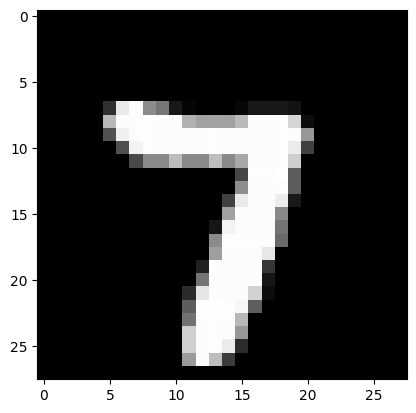

In [79]:
img12345 = X_test_scale[12345]
plt.imshow(img12345.reshape(28,28),cmap='gray')
plt.show()